# 📚 DATOS MASIVOS II
## 💻 Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas
## 🏫 Universidad Nacional Autónoma de México

<hr>

### 🤖 Reddit Comunities
### 🟠 Enlaces entre SubReddits
#### 👨‍👩‍👧‍👦 Análisis de Redes Sociales

<br>

#### Realizado por:
#### Iván Alejadro Ramos Herrera
#### 💜 [@arhcoder](https://github.com/arhcoder)



# [01] 📓 Selección de Dataset

## Reddit - Subreddits - Relations
### Fuente: https://snap.stanford.edu/data/soc-RedditHyperlinks.html
### Información del dataset:

> La red de hipervínculos representa las conexiones dirigidas entre dos subreddits (un subreddit es una comunidad en Reddit). También proporciona embeddings de subreddit. La red se extrae de datos de Reddit disponibles públicamente de 2.5 años desde enero de 2014 hasta abril de 2017.

> **Red de hipervínculos de subreddit:** la red de hipervínculos de subreddit a subreddit se extrae de las publicaciones que crean hipervínculos de un subreddit a otro. Decimos que un hipervínculo se origina en una publicación en la comunidad de origen y se vincula a una publicación en la comunidad de destino. Cada hipervínculo está anotado con tres propiedades: la marca de tiempo, el sentimiento de la publicación de la comunidad de origen hacia la publicación de la comunidad de destino y el vector de propiedad de texto de la publicación de origen. La red es dirigida, firmada, temporal y atribuida.

> Tenga en cuenta que cada publicación tiene un título y un cuerpo. El hipervínculo puede estar presente en el título de la publicación o en el cuerpo. Por lo tanto, proporcionamos un archivo de red para cada uno.

> **Embeddings de subreddit:** también proporcionamos vectores de incrustación que representan cada subreddit. Estos se pueden encontrar en el enlace de este conjunto de datos: subreddit incrustando conjunto de datos. Tenga en cuenta que no se pudieron generar algunas incrustaciones de subreddit, por lo que este archivo tiene 51,278 incrustaciones.

> **Sitio web del proyecto:** estos archivos se generaron como parte del proyecto de investigación sobre cómo los subreddits se atacan entre sí. Los detalles del proyecto se pueden encontrar aquí.

**Dataset statistics**

|  |  |
| ------------------ | - |
| Number of nodes (subreddits) |	55,863 |
| Number of edges (hyperlink between subreddits) |	858,490 |
| Edge weights (label of hyperlink) | 	-1 or +1 |
| Edge attributes | Text property vectors |
| Timespan | Jan 2014 - April 2017 |

# [02] 📖 Dataset

## Obtención

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# Se obtienen el par de datasets:
dataset1 = pd.read_csv("/content/drive/MyDrive/Datasets/Reddit/soc-redditHyperlinks-title.tsv", sep="\t")
dataset2 = pd.read_csv("/content/drive/MyDrive/Datasets/Reddit/soc-redditHyperlinks-body.tsv", sep="\t")

In [7]:
# Así es como luce un datset:
dataset2

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."
...,...,...,...,...,...,...
286556,negareddit,debatefascism,68im20s,2017-04-30 16:31:26,1,"441.0,405.0,0.775510204082,0.0294784580499,0.0..."
286557,mildlynomil,justnomil,68imlas,2017-04-30 04:19:03,1,"2226.0,1855.0,0.786163522013,0.00224618149146,..."
286558,mmorpg,blackdesertonline,68ip5os,2017-04-30 16:54:08,1,"1100.0,909.0,0.778181818182,0.00181818181818,0..."
286559,electricskateboards,askreddit,68ipb2s,2017-04-30 16:41:53,1,"1876.0,1567.0,0.78144989339,0.00692963752665,0..."


## Preparación

In [10]:
# Mezclando ambos dataset en uno y conservando sólo las características importantes:
dataset = pd.concat([dataset1[["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", "LINK_SENTIMENT"]], dataset2[["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", "LINK_SENTIMENT"]]], ignore_index=True)
dataset.columns = ["FROM", "TO", "SENTIMENT"]

In [11]:
dataset

,FROM,TO,SENTIMENT
0,rddtgaming,rddtrust,1
1,xboxone,battlefield_4,1
2,ps4,battlefield_4,1
3,fitnesscirclejerk,leangains,1
4,fitnesscirclejerk,lifeprotips,1
...,...,...,...
858483,negareddit,debatefascism,1
858484,mildlynomil,justnomil,1
858485,mmorpg,blackdesertonline,1
858486,electricskateboards,askreddit,1


## Exploración

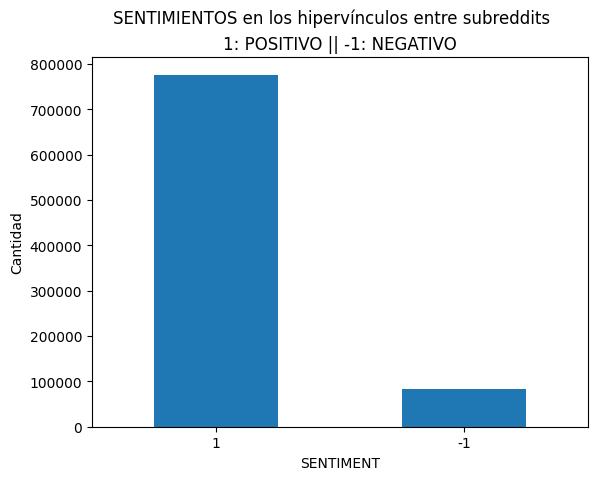

In [17]:
# Visualización de "SENTIMENT":
import matplotlib.pyplot as plt

sentiments = dataset["SENTIMENT"].value_counts()
sentiments.plot(kind="bar", rot=0)
plt.suptitle("SENTIMIENTOS en los hipervínculos entre subreddits")
plt.title("1: POSITIVO || -1: NEGATIVO")
plt.xlabel("SENTIMENT")
plt.ylabel("Cantidad")
plt.show()

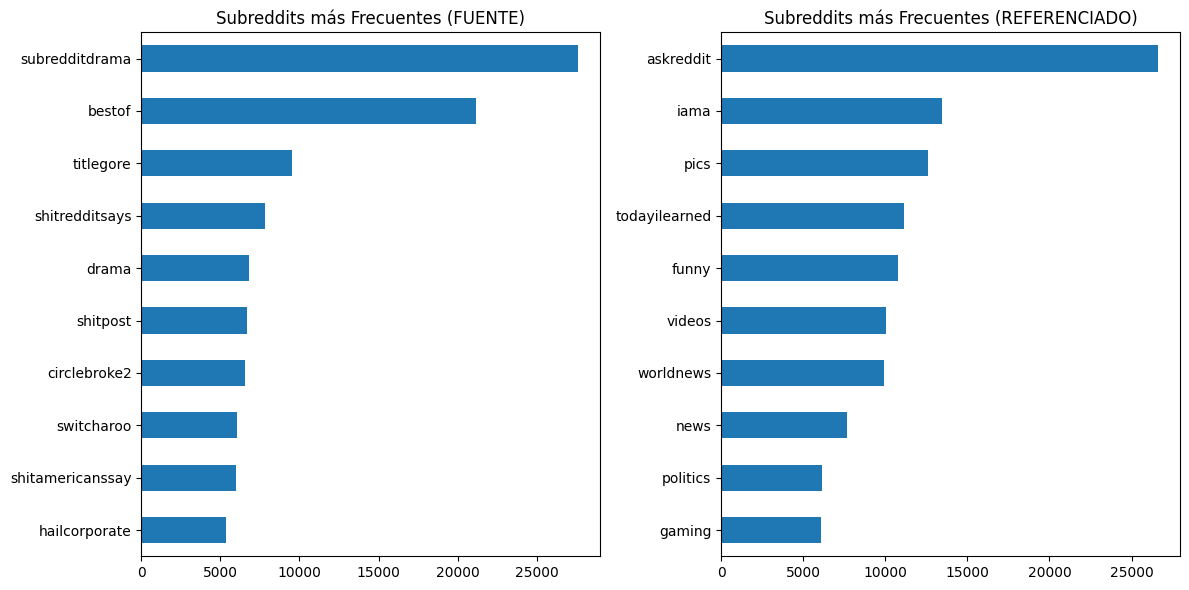

In [21]:
# Visualizando los subreddits más populares:
top_subreddits_from = dataset["FROM"].value_counts().head(10)[::-1]
top_subreddits_to = dataset["TO"].value_counts().head(10)[::-1]

# Crear gráficos de barras para los subreddits más frecuentes:
# [FUENTE]: Significa el subreddit desde el cuál se menciona el otro subreddit.
# [REFERENCIADO]: Significa el subreddit al que se mencionó en la publicación de "FUENTE".
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_subreddits_from.plot(kind="barh", )
plt.title("Subreddits más Frecuentes (FUENTE)")
plt.subplot(1, 2, 2)
top_subreddits_to.plot(kind="barh")
plt.title("Subreddits más Frecuentes (REFERENCIADO)")
plt.tight_layout()
plt.show()

# [03] 🎯 Objetivo

**📌Se tiene un esquema que representa cuántas veces se referencían los subreddits (comunidades), entonces; con este análisis de redes sociales se planteará analizar qué comunidades interactúan más con otras; o están más relacionadas, a una manera de entender qué grupo de subreddits podría pertenecer a un mismo grupo social.**

**📌 Se construirá un grafo que representará la cantidad de conexiones entre un subreddit y otro, de manera que se incluirá en la arista grafo (no-dirigido), la distancia entre ambos subreddits *(1 / cantidad de conexiones)***.

**📌 Se ignorará la columna de sentimiento, pues en este análisis sólo se reflejará qué tan relacionadas están unas comunidades con otras.**

# [04] 🌀 Transformación

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
# Genera un nuevo dataset en donde se cuenten la cantidad de conexiones entre dos nodos (subreddits);
# EN ESTE CASO SE ELIMINA LA BIDIRECCIONALIDAD; ES DECIR;
# SI SE TIENEN 10 CONEXIONES "A" => "B", Y 8 CONEXIONES;
# SÓLO SE CONTABILIZARÁN 18 CONEXIONES ENTRE "A" Y "B";

# Estructura de datos en donde contará las conexiones:
from collections import defaultdict
connections_count = defaultdict(int)

# Para cada conexión en el dataset:
for index, row in dataset.iterrows():
  # Obtiene los nodos "FROM" y "TO" de la conexión;
  # Ordena alfabéticamente los nombres, para que al incrustar la conexión,
  # se eviten las repeticiones de bidirección como A => B y B => A:
  nodes = sorted([row["FROM"], row["TO"]])

  # Se incremeta la conexión encontrada:
  connections_count[tuple(nodes)] += 1

# Estructura el nuevo dataset con conexiones:
new_data = {"NODE_A": [], "NODE_B": [], "CONNECTIONS": []}

# Itera sobre la estructura con conteos generada:
for nodes, count in connections_count.items():
  new_data["NODE_A"].append(nodes[0])
  new_data["NODE_B"].append(nodes[1])
  new_data["CONNECTIONS"].append(count)

# Dataset con el conteo de conexiones:
connections = pd.DataFrame(new_data)

In [52]:
connections

,NODE_A,NODE_B,CONNECTIONS
0,rddtgaming,rddtrust,1
1,battlefield_4,xboxone,5
2,battlefield_4,ps4,11
3,fitnesscirclejerk,leangains,23
4,fitnesscirclejerk,lifeprotips,20
...,...,...,...
309662,django,mongodb,1
309663,noshitouija,wholesomeouija,1
309664,anxiety,exnocontact,1
309665,debatefascism,negareddit,1


In [53]:
# Guarda el dataframe con conexiones:
connections.to_csv("/content/drive/MyDrive/Datasets/Reddit/Reddit-Connections.csv", index=False)

In [54]:
# Se genera la estructura final de grafo contando sólo las distancias;
# Distancia = 1 / conexiones:
for index, row in connections.iterrows():
    connections.at[index, "DISTANCE"] = 1 / row["CONNECTIONS"]

# Reorganiza las columnas y luego les cambia el nombre:
connections = connections[["NODE_A", "DISTANCE", "NODE_B"]]
connections.columns = ["subreddit1", "distance", "subreddit2"]

In [55]:
connections

,subreddit1,distance,subreddit2
0,rddtgaming,1.000000,rddtrust
1,battlefield_4,0.200000,xboxone
2,battlefield_4,0.090909,ps4
3,fitnesscirclejerk,0.043478,leangains
4,fitnesscirclejerk,0.050000,lifeprotips
...,...,...,...
309662,django,1.000000,mongodb
309663,noshitouija,1.000000,wholesomeouija
309664,anxiety,1.000000,exnocontact
309665,debatefascism,1.000000,negareddit


**🟠 DE ESTA MANERA SE OBTIENE EL DATASET QUE REPRESENTA UN GRAFO CON LAS CONEXIONES ENTRE SUBREDDITS, DE MANERA QUE LA DISTANCIA ENTRE CADA PAR DE SUBREDDITS CONECTADOS ES EQUIVALENTE A LA CANTIDAD DE RELACIÓN ENTRE AMBOS SUBREDDITS.**

**🟠 SI AMBOS SUBREDDITS ESTÁN MUY RELACIONADOS, SU DISTANCIA SERÁ CERCANA A O; SI NO, SU DISTANCIA ES 1; SI NO ESTÁN NADA RELACIONADOS, SIMPLEMENTE NO SE CONECTAN CON NINGUNA ARISTA.**

In [56]:
connections.to_csv("/content/drive/MyDrive/Datasets/Reddit/Reddit-Network.csv", index=False)

In [58]:
# Se limpia la RAM completamente ya que se terminaron los preprocesamientos:
try:
  del dataset1
  del dataset2
  del dataset
  del nodes
  del connections_count
  del new_data
  del connections
except:
  pass

# [05] 🔥 Grafo de Reddit

## Grafo principal

In [59]:
# Dataset para construir el grafo:
datagraph = pd.read_csv("/content/drive/MyDrive/Datasets/Reddit/Reddit-Network.csv")

In [60]:
datagraph

,subreddit1,distance,subreddit2
0,rddtgaming,1.000000,rddtrust
1,battlefield_4,0.200000,xboxone
2,battlefield_4,0.090909,ps4
3,fitnesscirclejerk,0.043478,leangains
4,fitnesscirclejerk,0.050000,lifeprotips
...,...,...,...
309662,django,1.000000,mongodb
309663,noshitouija,1.000000,wholesomeouija
309664,anxiety,1.000000,exnocontact
309665,debatefascism,1.000000,negareddit


In [80]:
# Se obtiene el dataset ordenado por los nodos más cercanos:
datagrpah_sorted = datagraph.sort_values(by="distance")

In [82]:
# Las 100 relaciones más importantes en el grafo:
datagrpah_sorted[:100]

,subreddit1,distance,subreddit2
226126,changelog,0.001825,trendingsubreddits
1877,android,0.002092,moronicmondayandroid
1045,leagueoflegends,0.002611,summonerschool
11405,buildapc,0.002801,techsupport
1290,drama,0.002865,subredditdrama
...,...,...,...
444,shitamericanssay,0.004739,worldnews
3689,nba,0.004762,nbacirclejerk
18075,shitpost,0.004762,todayilearned
115321,nosleep,0.004785,nosleepooc


In [61]:
# Se analiza si hay ciclos; conexiones de un nodo al mismo nodo:
(datagraph["subreddit1"] == datagraph["subreddit2"]).sum()

0

In [62]:
import networkx as nx

# SE CONSTRUYE EL GRAFO:
REDDIT = nx.Graph()

# Para cada fila construye un par de nodos y su arista:
for index, row in datagraph.iterrows():
  subreddit1 = row["subreddit1"]
  subreddit2 = row["subreddit2"]
  distance = row["distance"]

  # Agregar los nodos al grafo:
  REDDIT.add_node(subreddit1)
  REDDIT.add_node(subreddit2)

  # Agrega la arista entre los nodos:
  if distance <= 1:
    REDDIT.add_edge(subreddit1, subreddit2)

In [139]:
# Características del grafo:
print("Nodos:", len(REDDIT.nodes))
print("Aristas:", len(REDDIT.edges))

Nodos: 67180
Aristas: 309667


In [ ]:
# Muestra el grafo:
positions = nx.spring_layout(REDDIT, k=0.1)

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_title("REDDIT GRAPH")
nx.draw_networkx(
  REDDIT,
  pos=positions,
  node_size=10,
  edge_color="#F26D00",
  alpha=0.09,
  with_labels=False)
plt.show()

## Grafo aleatorio

In [65]:
# Red Aleatoria de Erdos-Renyi:
nodes = len(REDDIT.nodes)
edges = len(REDDIT.edges)

# Probabilidad para Erdos-Renyi:
p_random = edges / (nodes * (nodes - 1) / 2)
RANDOM = nx.erdos_renyi_graph(nodes, p_random)

In [ ]:
# Muestra el grafo:
positions = nx.spring_layout(RANDOM, k=0.1)

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_title("RANDOM GRAPH")
nx.draw_networkx(
  RANDOM,
  pos=positions,
  node_size=10,
  edge_color="#F26D00",
  alpha=0.09,
  with_labels=False)
plt.show()

# [06] 📊 Métricas de Comparación

## Componentes Conexas

In [66]:
# Componentes conexas para REDDIT:
reddit_cc = nx.number_connected_components(REDDIT)
print(f"[REDDIT] Componentes Conexas: {reddit_cc}")

# Componentes conexas para RANDOM:
random_cc = nx.number_connected_components(RANDOM)
print(f"[RANDOM] Componentes Conexas: {random_cc}")

[REDDIT] Componentes Conexas: 712
[RANDOM] Componentes Conexas: 4


## Componente Gigante

In [142]:
# Componente Gigante para REDDIT:
REDDIT_big_cc = max(nx.connected_components(REDDIT), key=len)
giant_component = REDDIT.subgraph(REDDIT_big_cc)
REDDIT_gigant_porcentage = len(giant_component.nodes) / len(REDDIT.nodes)
print(f"[REDDIT] Componente Gigante: {len(giant_component.nodes)} nodos")

# Componente Gigante para RANDOM:
RANDOM_big_cc = max(nx.connected_components(RANDOM), key=len)
giant_component = RANDOM.subgraph(RANDOM_big_cc)
RANDOM_gigant_porcentage = len(giant_component.nodes) / len(REDDIT.nodes)
print(f"[RANDOM] Componente Gigante: {len(giant_component.nodes)} nodos")

[REDDIT] Componente Gigante: 65648 nodos
[RANDOM] Componente Gigante: 67177 nodos


In [144]:
print(f"[REDDIT] Porcentaje de Componente Gigante: {REDDIT_gigant_porcentage*100:.2f}%")
print(f"[RANDOM] Porcentaje de Componente Gigante: {RANDOM_gigant_porcentage*100:.2f}%")

[REDDIT] Porcentaje de Componente Gigante: 97.72%
[RANDOM] Porcentaje de Componente Gigante: 100.00%


## Componente de Clusterización

In [69]:
# Coeficiente de Clusterización para REDDIT:
REDDIT_clustering = nx.average_clustering(REDDIT)
print(f"[REDDIT] Coeficiente de Clusterización: {REDDIT_clustering}")

# Coeficiente de Clusterización para RANDOM:
RANDOM_clustering = nx.average_clustering(RANDOM)
print(f"[RANDOM] Coeficiente de Clusterización: {RANDOM_clustering}")

[REDDIT] Coeficiente de Clusterización: 0.21696740126492536
[RANDOM] Coeficiente de Clusterización: 0.00014838887688572078


In [70]:
import numpy as np

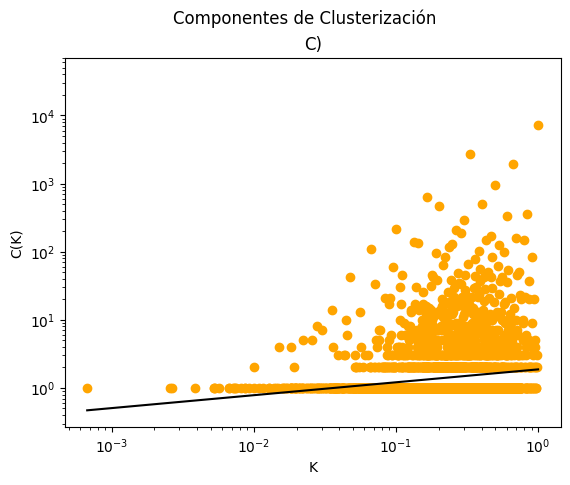

In [71]:
# PARA REDDIT:
clusters = nx.clustering(REDDIT)
comp = []
for value in clusters.values():
  comp.append(value)

values, counts = np.unique(comp, return_counts = True)
dfCC = pd.DataFrame({"xCC": values, "yCC": counts}, columns=["xCC", "yCC"])
x=dfCC[["xCC"]].to_numpy()
y=dfCC[["yCC"]].to_numpy()

x.astype(float);
y.astype(float);
dflog = np.log(dfCC[["xCC","yCC"]])
new_df = dflog.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

logx = new_df.xCC
logy = new_df.yCC
coeffs = np.polyfit(logx, logy, deg=1)
poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))

plt.suptitle("Componentes de Clusterización")
plt.title("Para la red REDDIT")
plt.loglog(x, y, "ko", color="orange")
plt.ylabel("C(K)")
plt.xlabel("K")
plt.title("C)")
plt.loglog(x,yfit(x), "k")
plt.show()

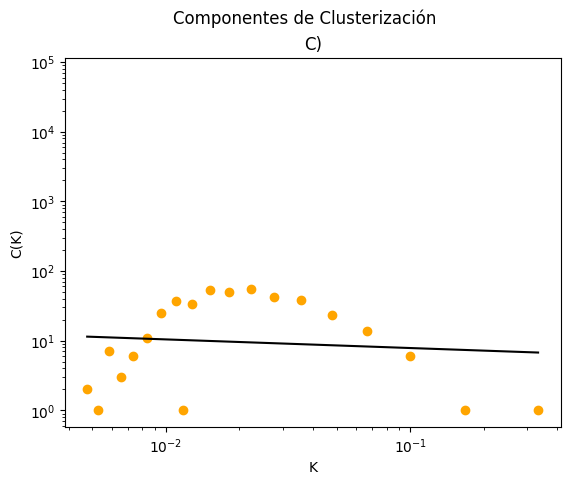

In [72]:
# PARA RANDOM:
clusters = nx.clustering(RANDOM)
comp = []
for value in clusters.values():
  comp.append(value)

values, counts = np.unique(comp, return_counts = True)
dfCC = pd.DataFrame({"xCC": values, "yCC": counts}, columns=["xCC", "yCC"])
x=dfCC[["xCC"]].to_numpy()
y=dfCC[["yCC"]].to_numpy()

x.astype(float);
y.astype(float);
dflog = np.log(dfCC[["xCC","yCC"]])
new_df = dflog.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

logx = new_df.xCC
logy = new_df.yCC
coeffs = np.polyfit(logx, logy, deg=1)
poly = np.poly1d(coeffs)
yfit = lambda x: np.exp(poly(np.log(x)))

plt.suptitle("Componentes de Clusterización")
plt.title("Para la red RANDOM")
plt.loglog(x, y, "ko", color="orange")
plt.ylabel("C(K)")
plt.xlabel("K")
plt.title("C)")
plt.loglog(x,yfit(x), "k")
plt.show()

## Distribución de Grados

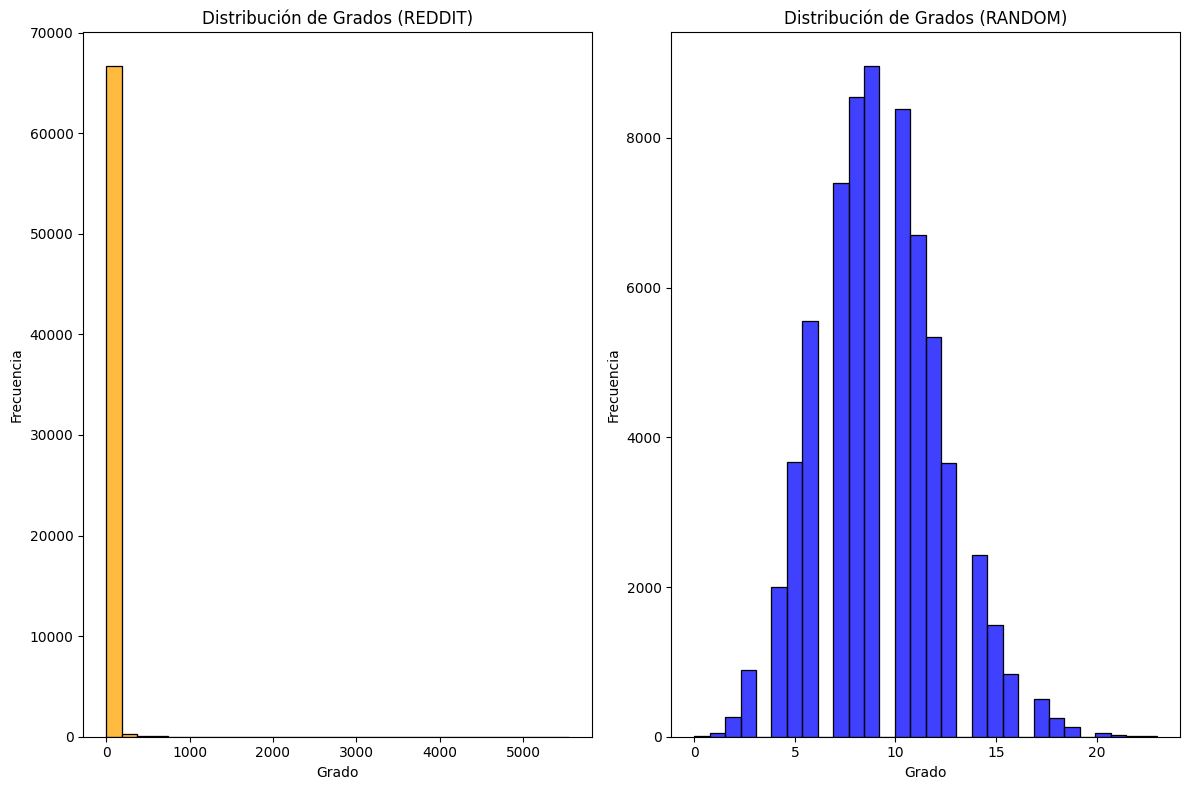

In [73]:
import seaborn as sns

# Grados de los nodos de REDDIT:
REDDIT_degrees = dict(REDDIT.degree())
REDDIT_degree_values = list(REDDIT_degrees.values())

# Grados de los nodos de RANDOM:
RANDOM_degrees = dict(RANDOM.degree())
RANDOM_degree_values = list(RANDOM_degrees.values())

# Gráfica de distribución de grados:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.histplot(REDDIT_degree_values, bins=30, kde=False, color="orange")
plt.title("Distribución de Grados (REDDIT)")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
sns.histplot(RANDOM_degree_values, bins=30, kde=False, color="blue")
plt.title("Distribución de Grados (RANDOM)")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

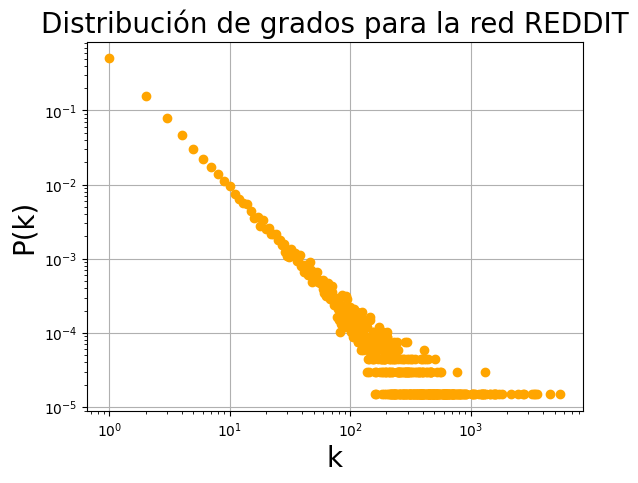

In [74]:
# Para REDDIT:
# Distribución de grados:
vk = dict(REDDIT.degree())
vk = list(vk.values())
maxk = np.max(vk)
mink = np.min(min)
kvalues= np.arange(0,maxk+1)
Pk = np.zeros(maxk+1)
for k in vk:
  Pk[k] = Pk[k] + 1
Pk = Pk/sum(Pk)

# Gráfica de distribución:
plt.figure()
plt.loglog(kvalues, Pk,"bo", color="orange")
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribución de grados para la red REDDIT", fontsize=20)
plt.grid(True)
plt.show()

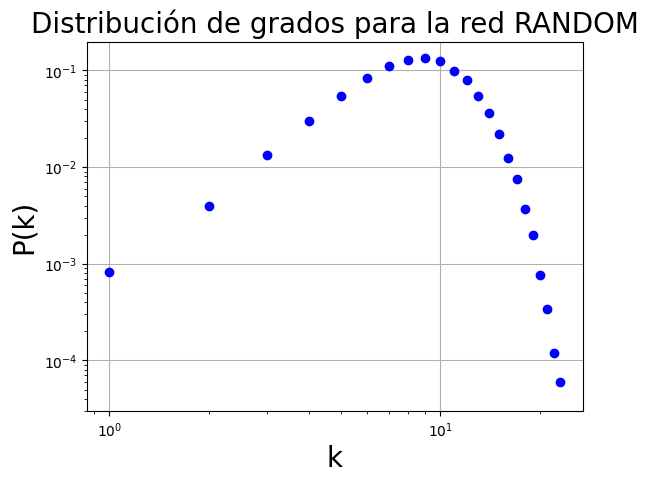

In [76]:
# Para RANDOM:
# Distribución de grados:
vk = dict(RANDOM.degree())
vk = list(vk.values())
maxk = np.max(vk)
mink = np.min(min)
kvalues= np.arange(0,maxk+1)
Pk = np.zeros(maxk+1)
for k in vk:
  Pk[k] = Pk[k] + 1
Pk = Pk/sum(Pk)

# Gráfica de distribución:
plt.figure()
plt.loglog(kvalues, Pk,"bo", color="blue")
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribución de grados para la red RANDOM", fontsize=20)
plt.grid(True)
plt.show()

## Centralidades

### Degree

In [136]:
import operator

In [87]:
# Degree para REDDIT:
DegreeCentrality = nx.degree_centrality(REDDIT)
sortedDCen = sorted(DegreeCentrality.items(), key=operator.itemgetter(1), reverse=True)
REDDIT_Degree = pd.DataFrame(sortedDCen, columns =["Nodo", "Degree_Centrality"])
REDDIT_Degree.head(10)

,Nodo,Degree_Centrality
0,askreddit,0.082570
1,iama,0.068489
2,subredditdrama,0.052546
3,pics,0.050626
4,bestof,0.050447
5,funny,0.048348
6,todayilearned,0.041263
7,videos,0.040816
8,titlegore,0.036961
9,gaming,0.032466


In [88]:
# Degree para RANDOM:
DegreeCentrality = nx.degree_centrality(RANDOM)
sortedDCen = sorted(DegreeCentrality.items(), key=operator.itemgetter(1), reverse=True)
RANDOM_Degree = pd.DataFrame(sortedDCen, columns =["Nodo", "Degree_Centrality"])
RANDOM_Degree.head(10)

,Nodo,Degree_Centrality
0,37507,0.000342
1,48249,0.000342
2,60045,0.000342
3,62430,0.000342
4,13734,0.000327
5,21233,0.000327
6,21737,0.000327
7,22852,0.000327
8,42700,0.000327
9,46935,0.000327


### Betweenness

In [ ]:
# Betweenness para REDDIT:
betweenness_dict = nx.betweenness_centrality(REDDIT)
sorted_betweenness = sorted(betweenness_dict.items(), key=operator.itemgetter(1), reverse=True)
REDDIT_Betweenness = pd.DataFrame(sorted_betweenness, columns =["Nodo", "Betweenness"])
REDDIT_Betweenness.head(10)

In [ ]:
# Betweenness para RANDOM:
betweenness_dict = nx.betweenness_centrality(RANDOM)
sorted_betweenness = sorted(betweenness_dict.items(), key=operator.itemgetter(1), reverse=True)
RANDOM_Betweenness = pd.DataFrame(sorted_betweenness, columns =["Nodo", "Betweenness"])
RANDOM_Betweenness.head(10)

### Closeness

In [ ]:
# Closeness para REDDIT:
closeness_dict = nx.closeness_centrality(REDDIT)
sorted_closeness = sorted(closeness_dict.items(), key=operator.itemgetter(1), reverse=True)
REDDIT_Closeness = pd.DataFrame(sorted_closeness, columns =["Nodo", "Closeness"])
REDDIT_Closeness.head(10)

In [ ]:
# Closeness para RANDOM:
closeness_dict = nx.closeness_centrality(RANDOM)
sorted_closeness = sorted(closeness_dict.items(), key=operator.itemgetter(1), reverse=True)
RANDOM_Closeness = pd.DataFrame(sorted_closeness, columns =["Nodo", "Closeness"])
RANDOM_Closeness.head(10)

### Eigenvector

In [124]:
# Eigenvector para REDDIT:
eigenvector_dict = nx.eigenvector_centrality(REDDIT)
sorted_eigenvector = sorted(eigenvector_dict.items(),key=operator.itemgetter(1), reverse=True)
REDDIT_Eigenvector = pd.DataFrame(sorted_eigenvector, columns =["Nodo", "Eigenvector"])
REDDIT_Eigenvector.head(10)

,Nodo,Eigenvector
0,askreddit,0.151189
1,subredditdrama,0.138210
2,bestof,0.135955
3,iama,0.134563
4,pics,0.122257
5,funny,0.121302
6,todayilearned,0.118589
7,videos,0.113611
8,titlegore,0.105006
9,drama,0.093133


In [125]:
# Eigenvector para RANDOM:
eigenvector_dict = nx.eigenvector_centrality(RANDOM)
sorted_eigenvector = sorted(eigenvector_dict.items(),key=operator.itemgetter(1), reverse=True)
RANDOM_Eigenvector = pd.DataFrame(sorted_eigenvector, columns =["Nodo", "Eigenvector"])
RANDOM_Eigenvector.head(10)

,Nodo,Eigenvector
0,60045,0.011009
1,16105,0.010489
2,54846,0.010468
3,21233,0.010387
4,62430,0.010289
5,4405,0.010107
6,56212,0.010046
7,22852,0.010032
8,53765,0.009954
9,46866,0.009945


### PageRank

In [122]:
# PageRank para REDDIT:
Pagerank_dict = nx.pagerank(REDDIT)
sorted_Pagerank = sorted(Pagerank_dict.items(),key=operator.itemgetter(1), reverse=True)
REDDIT_PageRank = pd.DataFrame(sorted_Pagerank, columns =["Nodo", "PageRank"])
REDDIT_PageRank.head(10)

,Nodo,PageRank
0,askreddit,0.008933
1,iama,0.006824
2,pics,0.004743
3,funny,0.004663
4,subredditdrama,0.004328
5,bestof,0.004097
6,videos,0.003619
7,todayilearned,0.003575
8,writingprompts,0.003335
9,titlegore,0.003163


In [123]:
# PageRank para RANDOM:
Pagerank_dict = nx.pagerank(RANDOM)
sorted_Pagerank = sorted(Pagerank_dict.items(),key=operator.itemgetter(1), reverse=True)
RANDOM_PageRank = pd.DataFrame(sorted_Pagerank, columns =["Nodo", "PageRank"])
RANDOM_PageRank.head(10)

,Nodo,PageRank
0,48249,0.000034
1,37507,0.000034
2,62430,0.000033
3,46935,0.000033
4,21737,0.000033
5,60045,0.000033
6,44393,0.000033
7,58031,0.000033
8,61132,0.000033
9,13734,0.000033


### Comparación

In [127]:
# Comparación en las métricas de centralidad en REDDIT:
degree = pd.Series(dict(nx.degree(REDDIT)), name="Degree")
# betweenness = pd.Series(nx.betweenness_centrality(REDDIT), name="Betweenness")
# closeness = pd.Series(nx.closeness_centrality(REDDIT), name="Closeness")
eigenvector = pd.Series(nx.eigenvector_centrality(REDDIT), name="Eigenvector")
pagerank = pd.Series(nx.pagerank(REDDIT), name="PageRank")

# centrality = pd.concat([degree, betweenness, closeness, eigenvector, pagerank], axis=1)
centrality = pd.concat([degree, eigenvector, pagerank], axis=1)
centrality.index.name = "Nodo"
centrality.head(10)

,Degree,Eigenvector,PageRank
Nodo,,,
rddtgaming,3,4.050718e-05,0.000011
rddtrust,1,1.664185e-07,0.000005
battlefield_4,117,1.095595e-02,0.000161
xboxone,409,2.218379e-02,0.000588
ps4,431,2.409219e-02,0.000608
fitnesscirclejerk,566,4.505345e-02,0.000664
leangains,33,3.372862e-03,0.000041
lifeprotips,767,5.343551e-02,0.000960
cancer,59,6.786381e-03,0.000076


In [131]:
# TOP 10 NODOS en REDDIT según cada métrica:
top_subreddits = pd.DataFrame()
for metric in centrality.columns:
  top_nodes = centrality[metric].sort_values(ascending=False).head(10).index.to_list()
  top_nodes.sort()
  top_subreddits[f"Top 10 Nodos [{metric}]"] = top_nodes

In [132]:
top_subreddits

,Top 10 Nodos [Degree],Top 10 Nodos [Eigenvector],Top 10 Nodos [PageRank]
0,askreddit,askreddit,askreddit
1,bestof,bestof,bestof
2,funny,drama,funny
3,gaming,funny,iama
4,iama,iama,pics
5,pics,pics,subredditdrama
6,subredditdrama,subredditdrama,titlegore
7,titlegore,titlegore,todayilearned
8,todayilearned,todayilearned,videos
9,videos,videos,writingprompts


# [08] 👨‍👩‍👧‍👦 Comunidades

**✅ Utilizando el <s>Algoritmo Girvan-Newman</s> Louvain para identificar qué subreddits podría formar comunidades con respecto a su cercanía. Descubrirémos qué comunidades se quieren (o se odian) por su nivel de interacción.**

In [133]:
# Algoritmo de Louvain:
communities = nx.community.louvain_communities(REDDIT, seed=44)

In [134]:
# Imprime las comunidades principales:
print("\n_________________________________________________\n")
print("🔶🤖 COMUNIDADES DE COMUNIDADES EN REDDIT 🤖🔶")
print("_________________________________________________\n")
for community in communities:
  print(f" * {community}")
print("\n_________________________________________________\n")


_________________________________________________

🔶🤖 COMUNIDADES DE COMUNIDADES EN REDDIT 🤖🔶
_________________________________________________

 * {'gtav_money_lobby', 'gtamoneydrop', 'gtavunlimited', 'gta_irl', 'gta5money', 'gta_5_hack_online', 'gtaonlinehax', 'gta5onlinemoneyglitch', 'gtav_money_drops', 'gta5onlinefreemoney', 'gtav_online_hacks', 'gta5pc', 'gtaoheists', 'gtavmoneyhax', 'gtamodding', 'gtavmoneylobby', 'gtaonlinewelfareline'}
 * {'bakugan', 'doubledog', 'substealers', 'kim_kardashian_naked', 'chowder', 'kim_kardashian'}
 * {'backwardsbb', 'tdrankdown', 'tdresistance', 'totaldramaroleplay', 'totaldramauniverse', 'totaldramabigbrother', 'totaldramacaptions', 'totaldramahorror', 'fessliebrigade', 'solitd', 'tdinteractive', 'ridonculousdrama', 'survivor_roleplay', 'thedarkestdrama', 'totaldramaparty', 'totaldramamusic', 'totaldanganroleplay', 'totaldramaroleplay2', 'totaldramatheroleplay', 'totaldramawerewolf', 'letsbuildaworld', 'tdrdiscussion', 'totaldramamansion', 'to

# [09] ❓ Preguntas clave

## 01. Estructura global de la red

In [106]:
print("Nodos:", len(REDDIT.nodes))
print("Aristas:", len(REDDIT.edges))
print("Densidad:", nx.density(REDDIT))

Nodos: 67180
Aristas: 309667
Densidad: 0.0001372307345882558


## 02. ¿Se ajusta a un modelo de Barabási-Albert?

In [111]:
# Grafo de Barabási-Albert:
ba_model = nx.barabasi_albert_graph(len(REDDIT.nodes), 3)

# Comparación en las distribuciones de grados:
degreesx = sorted([d for n, d in REDDIT.degree()], reverse=True)
secuences = sorted([d for n, d in ba_model.degree()], reverse=True)

print(f"Distribución de REDDIT:\n{degreesx}")
print(f"\nDistribución de Modelo de Barabási-Albert:\n{secuences}")

Distribución de REDDIT:
[5547, 4601, 3530, 3401, 3389, 3248, 2772, 2742, 2483, 2181, 1821, 1727, 1626, 1603, 1583, 1565, 1543, 1457, 1435, 1343, 1320, 1320, 1299, 1291, 1286, 1254, 1253, 1250, 1216, 1177, 1093, 1070, 1055, 1032, 1024, 918, 907, 890, 884, 861, 859, 840, 835, 818, 812, 808, 797, 779, 778, 771, 767, 767, 756, 747, 727, 722, 717, 716, 712, 708, 703, 702, 695, 688, 678, 677, 667, 664, 653, 651, 648, 645, 639, 630, 629, 625, 624, 620, 617, 610, 608, 606, 603, 598, 597, 592, 588, 587, 578, 576, 568, 568, 566, 560, 553, 553, 551, 543, 542, 539, 538, 529, 525, 524, 524, 522, 520, 518, 517, 516, 513, 509, 509, 509, 501, 498, 497, 495, 490, 489, 488, 486, 485, 483, 482, 477, 473, 473, 471, 471, 470, 465, 465, 463, 462, 461, 460, 459, 457, 457, 452, 451, 450, 450, 449, 448, 444, 440, 439, 439, 439, 438, 437, 434, 434, 431, 427, 427, 427, 425, 425, 421, 417, 416, 410, 410, 410, 409, 409, 409, 409, 407, 406, 405, 404, 404, 403, 401, 399, 399, 398, 397, 397, 396, 395, 394, 394, 394, 

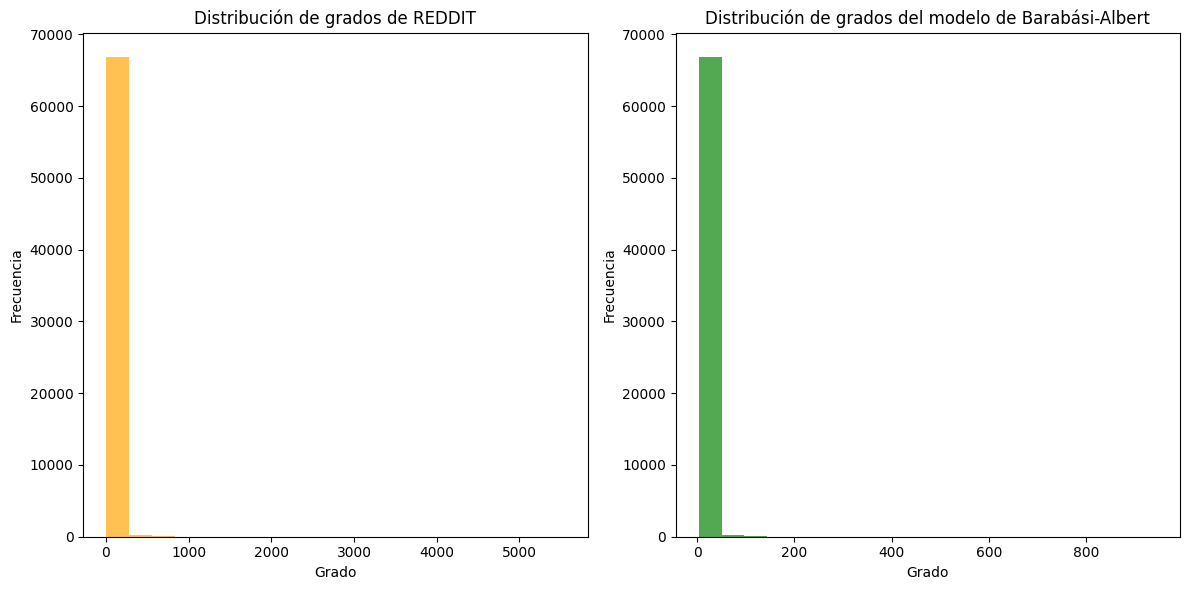

In [118]:
# Graficar las distribuciones de grados:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(degreesx, bins=20, color="orange", alpha=0.68)
plt.title("Distribución de grados de REDDIT")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(secuences, bins=20, color="green", alpha=0.68)
plt.title("Distribución de grados del modelo de Barabási-Albert")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

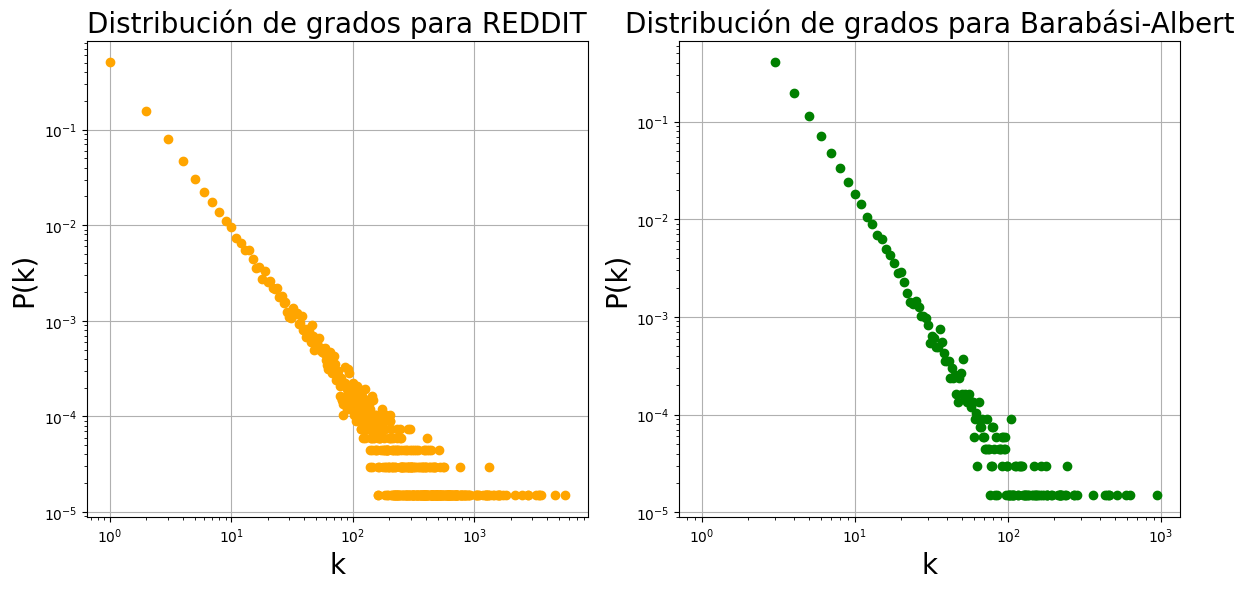

In [119]:
# Distribución de grados para REDDIT:
vk_reddit = dict(REDDIT.degree())
vk_reddit = list(vk_reddit.values())
maxk_reddit = np.max(vk_reddit)
kvalues_reddit = np.arange(0, maxk_reddit + 1)
Pk_reddit = np.zeros(maxk_reddit + 1)
for k in vk_reddit:
  Pk_reddit[k] = Pk_reddit[k] + 1
Pk_reddit = Pk_reddit / sum(Pk_reddit)

# Distribución de grados para el modelo de Barabási-Albert:
vk_ba_model = dict(ba_model.degree())
vk_ba_model = list(vk_ba_model.values())
maxk_ba_model = np.max(vk_ba_model)
kvalues_ba_model = np.arange(0, maxk_ba_model + 1)
Pk_ba_model = np.zeros(maxk_ba_model + 1)
for k in vk_ba_model:
  Pk_ba_model[k] = Pk_ba_model[k] + 1
Pk_ba_model = Pk_ba_model / sum(Pk_ba_model)

# Grafica ambas distribuciones:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.loglog(kvalues_reddit, Pk_reddit, "bo", color="orange")
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribución de grados para REDDIT", fontsize=20)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.loglog(kvalues_ba_model, Pk_ba_model, "bo", color="green")
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribución de grados para Barabási-Albert", fontsize=20)
plt.grid(True)

plt.tight_layout()
plt.show()

**✅ LA RED DE REDDIT SÍ SE ADAPTA A UN MODELO DE BARABÁSI-ALBERT**

## 03. ¿Tiene características de red de mundo pequeño?

In [120]:
# Coeficiente de clusterización:
print(f"Coeficiente de Clusterización: {REDDIT_clustering}\n")

Coeficiente de Clusterización: 0.21696740126492536



In [ ]:
# Promedio de caminos cortos;
# Para cada componente conectado:
avg_short_paths_list = []
i = 0
max_paths = 1
for component in nx.connected_components(REDDIT):
  if i == max_paths:
    break
  subgraph = REDDIT.subgraph(component)
  avg_short_paths = nx.average_shortest_path_length(subgraph)
  avg_short_paths_list.append(avg_short_paths)
  print(f"Promedio de caminos cortos para un: {avg_short_paths}")
  i += 1

## 04. ¿Cuál es el promedio de caminos cortos?

In [ ]:
# Muestra los promedios de caminos cortos encontrados:
for i, avg_short_paths in enumerate(avg_short_paths_list):
  print(f"Promedio de caminos cortos para el componente {i + 1}: {avg_short_paths}")

# [10] 💜 @arhcoder
## Realizado por:
### Iván Alejadro Ramos Herrera
### 💜 [@arhcoder](https://github.com/arhcoder)